<h1>CS 180 ARTIFICIAL INTELLIGENCE PROJECT</h1>

<h2>Job Seeker: Determining Job Postings as Real/Fake</h2>

<h3> INTRODUCTION </h3>

The amount of fresh graduates is increasing each year and along with this the demand for job openings as well. Contrary to the demand, job openings are gradually decreasing which some people take advantage of to post fraudulent job postings. Because of this, Job Seeker hopes to determine on whether a specific job posting is fraudulent or legitimate. Several models were implemented to showcase the different accuracy scores as well as compare it to some existing models.

<h3> DATA COLLECTION </h3>

There are 2 datasets being used in this project which is the main dataset implemented by the other communities as well as a supplement dataset "Job postings in Nigeria". This dataset will be used to augment the main dataset.

First we import the necessary modules needed in processing the data as well as implementing the model. The general flow for this project is to describe the data and seek out similarities and differences with the other dataset from the main dataset being used. After knowing what the similarities and differences of each dataset are, we then proceed to <b>Preprocessing</b> these data one-by-one so that we can augment them cleanly.

In [48]:
import re
import string
import numpy as np
import pandas as pd
import random
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from wordcloud import WordCloud

import nltk
import copy
import spacy

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize,sent_tokenize

from spacy.lang.en.stop_words import STOP_WORDS

import warnings
warnings.filterwarnings("ignore")

<h5> We first import the two datasets being augmented. </h5>

In [49]:
md = pd.read_csv('fake_job_postings.csv')
md.head()



,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [50]:
df = pd.read_csv('CompiledjobListNigeria.csv')
df.head()

,job_title,company_name,company_desc,job_desc,job_requirement,salary,location,employment_type,department,label
0,Accountant,Equity Model Limited,"Accounting, Auditing & Finance","Compiling, analyzing, and reporting financial ...",This position is open preferably to a male can...,"75,000 - 150,000",Abuja,Full Time,Law & Compliance,0
1,Content Writer,CLINTON FUND (CF),Management & Business Development,"Creating, improving and maintaining content to...","Bachelor's degree in Journalism, English, Com...","60,000 - 100,000",Lagos,Full Time,Content Writing,1
2,Accountant,Schleez Nigeria Limited,"Accounting, Auditing & Finance","Managing financial transactions, preparing fin...",Minimum of Bachelor's degree in Accounting or ...,Negotiable,"First Floor, Left Wing, No. 49, Olowu Street, ...",Full-time,Accounting,1
3,Sales Executive,Bons Industries Limited,Marketing & Communications,"Understanding of the sales process and dynamics.""",Minimum academic qualification of BSC/HND Degr...,"75,000 - 150,000",Enugu,Full Time,Manufacturing & Warehousing,0
4,Bulk/Partnership Marketing Officer,TAMAK LOGISTICS,Marketing & Communications,Establish relationships with major businesses ...,"Be smart & resourceful.,Great knowledge of how...","Less than 75,000",Lagos,Full Time,Shipping & Logistics,0


<Axes: >

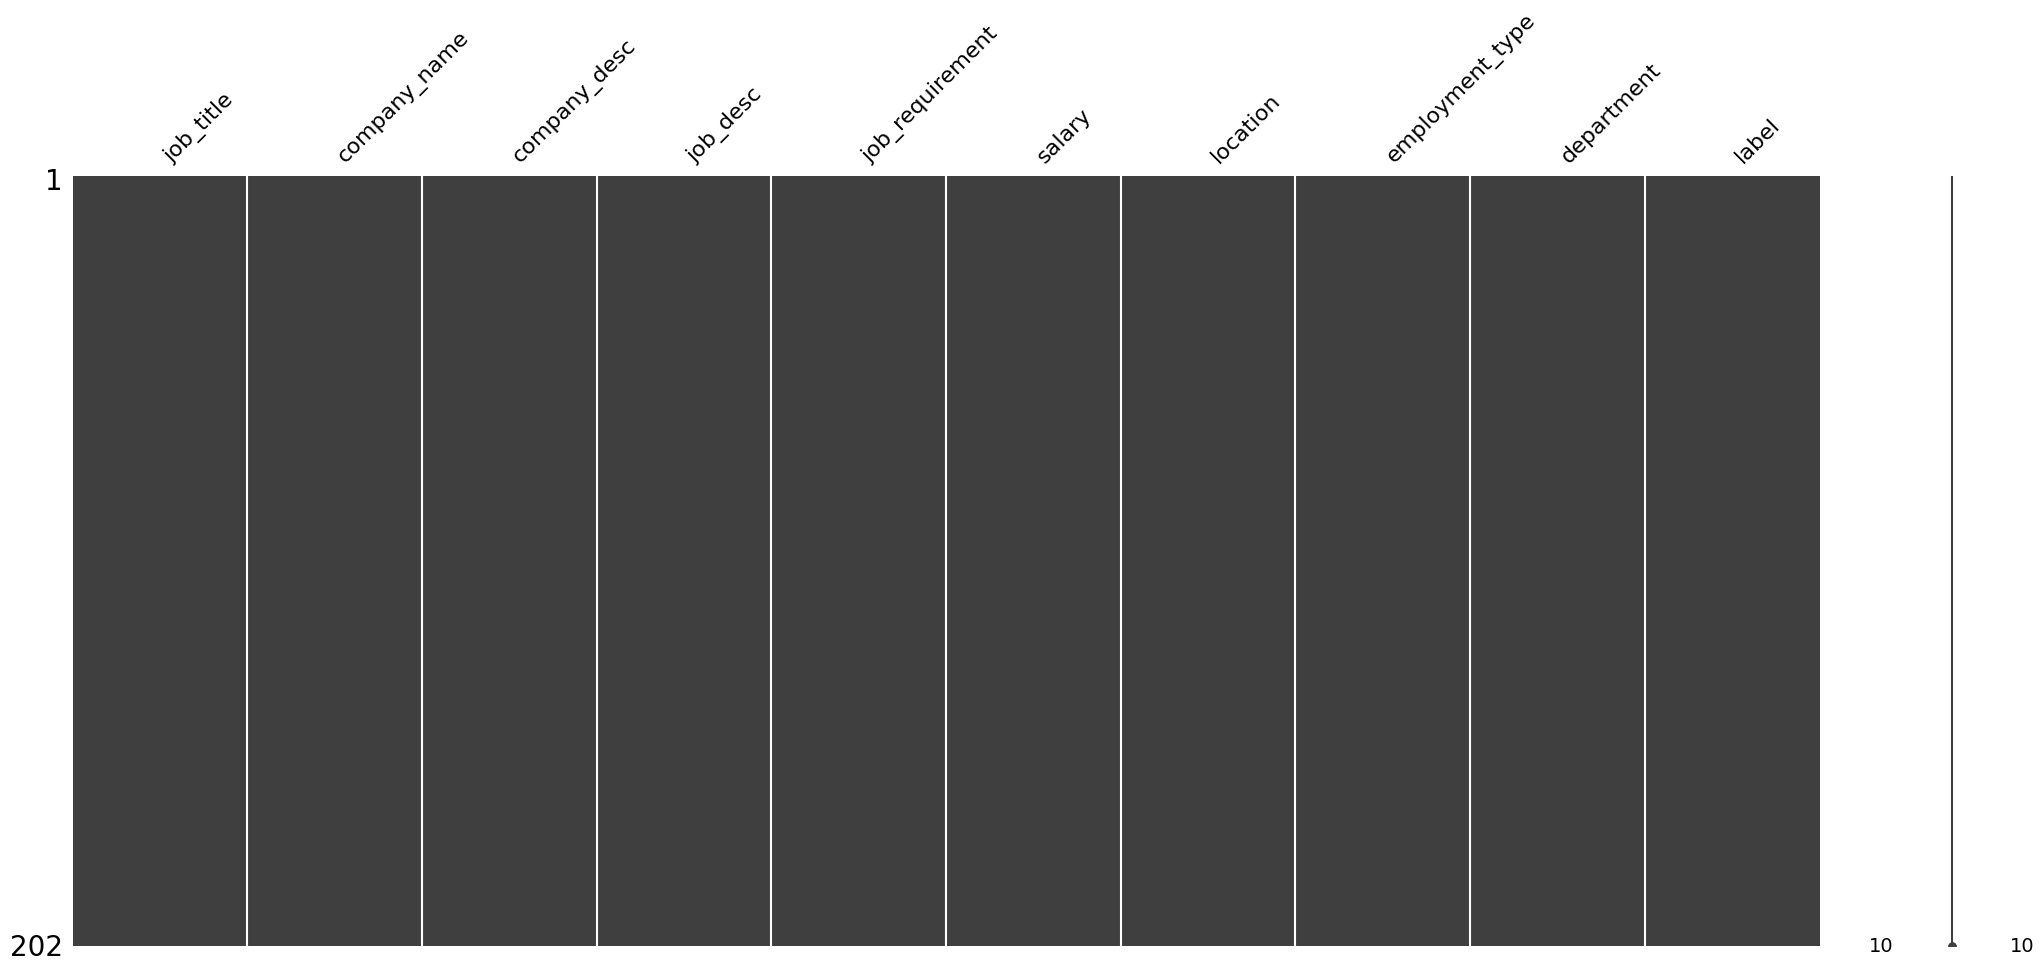

In [51]:
msno.matrix(df)

<Axes: >

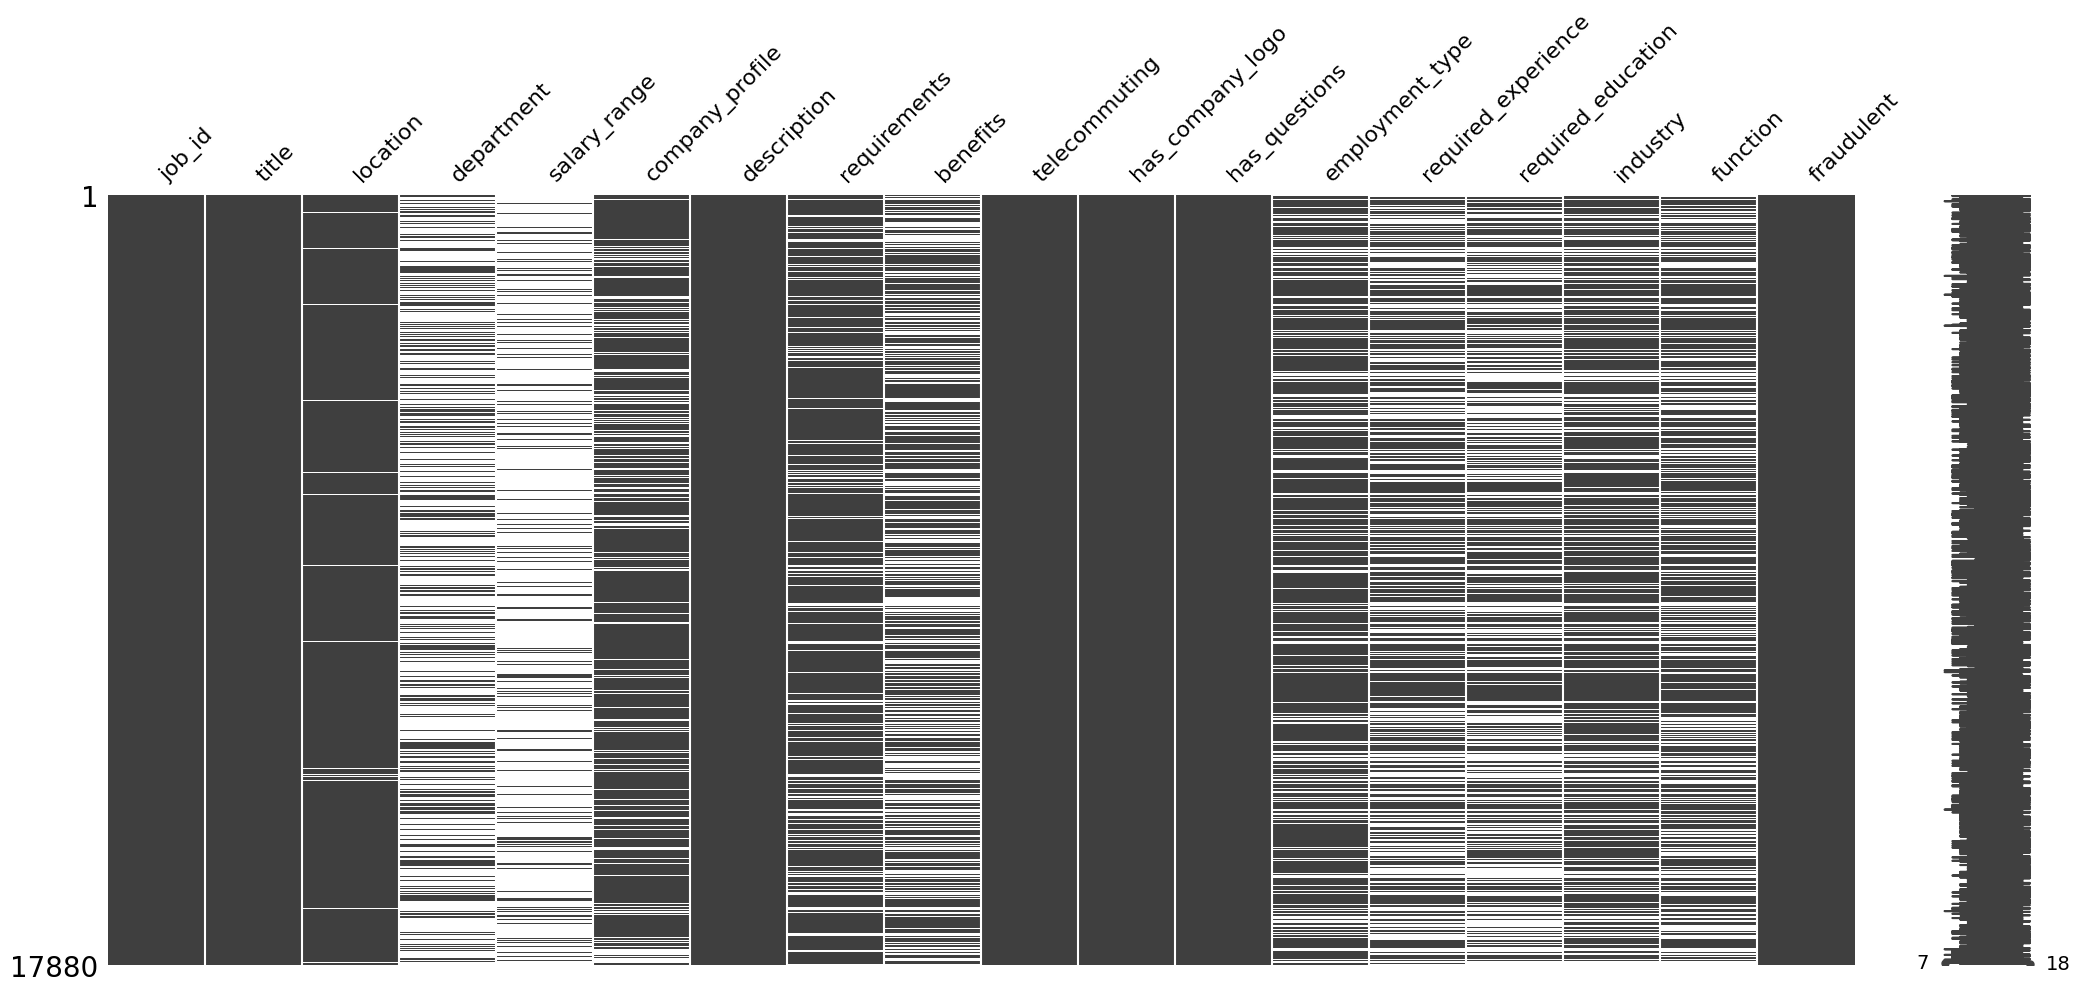

In [52]:
msno.matrix(md)

We know that the nigeria dataset has no null values but the main dataset being used has tons of null values. Next we decide what columns to use and augment together as well as what columns we need to drop.

In [53]:
md.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [54]:
md.drop(['job_id', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'required_experience', 'required_education', 'function', 'salary_range', 'industry'], axis=1, inplace=True)
md.head(10)

,title,location,department,company_profile,description,requirements,employment_type,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Other,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,Full-time,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Full-time,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full-time,0
5,Accounting Clerk,"US, MD,",NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Full-time,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",NaN,0
8,HP BSM SME,"US, FL, Pensacola",NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Full-time,0
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Part-time,0


we then proceed to dropping useless columns in the nigeria dataset

In [55]:
df.drop(['salary'], axis=1, inplace=True)
df.head()

,job_title,company_name,company_desc,job_desc,job_requirement,location,employment_type,department,label
0,Accountant,Equity Model Limited,"Accounting, Auditing & Finance","Compiling, analyzing, and reporting financial ...",This position is open preferably to a male can...,Abuja,Full Time,Law & Compliance,0
1,Content Writer,CLINTON FUND (CF),Management & Business Development,"Creating, improving and maintaining content to...","Bachelor's degree in Journalism, English, Com...",Lagos,Full Time,Content Writing,1
2,Accountant,Schleez Nigeria Limited,"Accounting, Auditing & Finance","Managing financial transactions, preparing fin...",Minimum of Bachelor's degree in Accounting or ...,"First Floor, Left Wing, No. 49, Olowu Street, ...",Full-time,Accounting,1
3,Sales Executive,Bons Industries Limited,Marketing & Communications,"Understanding of the sales process and dynamics.""",Minimum academic qualification of BSC/HND Degr...,Enugu,Full Time,Manufacturing & Warehousing,0
4,Bulk/Partnership Marketing Officer,TAMAK LOGISTICS,Marketing & Communications,Establish relationships with major businesses ...,"Be smart & resourceful.,Great knowledge of how...",Lagos,Full Time,Shipping & Logistics,0


Notice that the company_profile in the main dataset is just the combination of company_name and company_desc in the nigeria dataset so we combine these two columns into 1 along with their contents.

In [56]:
df['company_profile'] = df['company_name'] + ' ' + df['company_desc']
df.drop(['company_name', 'company_desc'], axis=1, inplace=True)


In [57]:
df.head(10)


,job_title,job_desc,job_requirement,location,employment_type,department,label,company_profile
0,Accountant,"Compiling, analyzing, and reporting financial ...",This position is open preferably to a male can...,Abuja,Full Time,Law & Compliance,0,"Equity Model Limited Accounting, Auditing & Fi..."
1,Content Writer,"Creating, improving and maintaining content to...","Bachelor's degree in Journalism, English, Com...",Lagos,Full Time,Content Writing,1,CLINTON FUND (CF) Management & Business Develo...
2,Accountant,"Managing financial transactions, preparing fin...",Minimum of Bachelor's degree in Accounting or ...,"First Floor, Left Wing, No. 49, Olowu Street, ...",Full-time,Accounting,1,"Schleez Nigeria Limited Accounting, Auditing &..."
3,Sales Executive,"Understanding of the sales process and dynamics.""",Minimum academic qualification of BSC/HND Degr...,Enugu,Full Time,Manufacturing & Warehousing,0,Bons Industries Limited Marketing & Communicat...
4,Bulk/Partnership Marketing Officer,Establish relationships with major businesses ...,"Be smart & resourceful.,Great knowledge of how...",Lagos,Full Time,Shipping & Logistics,0,TAMAK LOGISTICS Marketing & Communications
5,Marketer/Sales Executive,"Present, promote, and sell products/services u...",This position is open preferably to a female c...,Lagos,Full Time,Hospitality & Hotel,0,Color Sense Limited Sales
6,Medical Sales Representative,Researching competitors’ medications and their...,Minimum academic qualification of a Diploma in...,Rest of Nigeria (Kogi),Full Time,Healthcare,0,Sylken Ltd Medical & Pharmaceutical
7,Group Sales Lead,Establishing sales goals for individual sales ...,"Minimum of 3 years of experience,Excellent com...",Lagos,Full Time,"Banking, Finance & Insurance",0,Leadway Assurance Sales
8,Real Estate Agent,"Assist clients in buying, selling, and renting...",Minimum of Bachelor's degree in any field. At ...,Lagos State,Full-time,Real Estate,1,HOME PLACES CONSULT Real Estate
9,Medical Sales Representative,Researching competitors’ medications and their...,Minimum academic qualification of a Diploma in...,Lagos,Full Time,Healthcare,0,Sylken Ltd Medical & Pharmaceutical


In [58]:
md.head()

,title,location,department,company_profile,description,requirements,employment_type,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Other,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,Full-time,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Full-time,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full-time,0


Notice that the columns are now the same with each dataset however there are differing values in the employment_type datacolumn because of hyphens. Since they mean the same value, we need to remove the hyphens.

In [59]:
md.employment_type.unique()

array(['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

In [60]:
df.employment_type.unique()

array(['Full Time', 'Full-time', 'Internship & Graduate', 'Contract',
       'Part Time'], dtype=object)

In [61]:
df['employment_type'] = df['employment_type'].replace(['Full Time'], 'Full-time')
df['employment_type'] = df['employment_type'].replace(['Part Time'], 'Part-time')
df.employment_type.unique()

array(['Full-time', 'Internship & Graduate', 'Contract', 'Part-time'],
      dtype=object)

In [62]:
md.fillna('', inplace=True)
md.isnull().sum()

title              0
location           0
department         0
company_profile    0
description        0
requirements       0
employment_type    0
fraudulent         0
dtype: int64

In [63]:
md['text'] = md['title'] + ' ' + md['location'] + ' ' + md['department'] + ' ' + md['company_profile'] + ' ' + md['description'] + ' ' + md['requirements'] + ' ' + md['employment_type']
md.drop(['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'employment_type'], axis=1, inplace=True)
md.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSo..."


In [64]:
df['text'] = df['job_title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['job_desc'] + ' ' + df['job_requirement'] + ' ' + df['employment_type']
df.drop(['job_title', 'location', 'department', 'company_profile', 'job_desc', 'job_requirement', 'employment_type'], axis=1, inplace=True)
df.rename(columns={'label':'fraudulent'}, inplace=True)
df.head()

,fraudulent,text
0,0,Accountant Abuja Law & Compliance Equity Model...
1,1,Content Writer Lagos Content Writing CLINTON F...
2,1,"Accountant First Floor, Left Wing, No. 49, Olo..."
3,0,Sales Executive Enugu Manufacturing & Warehous...
4,0,Bulk/Partnership Marketing Officer Lagos Shipp...


In [65]:
augmented = pd.concat([md, df])

augmented.shape



(18082, 2)

In [66]:
augmented.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSo..."


In [67]:
fraudjobs_text = augmented[augmented.fraudulent==1].text
actualjobs_text = augmented[augmented.fraudulent==0].text

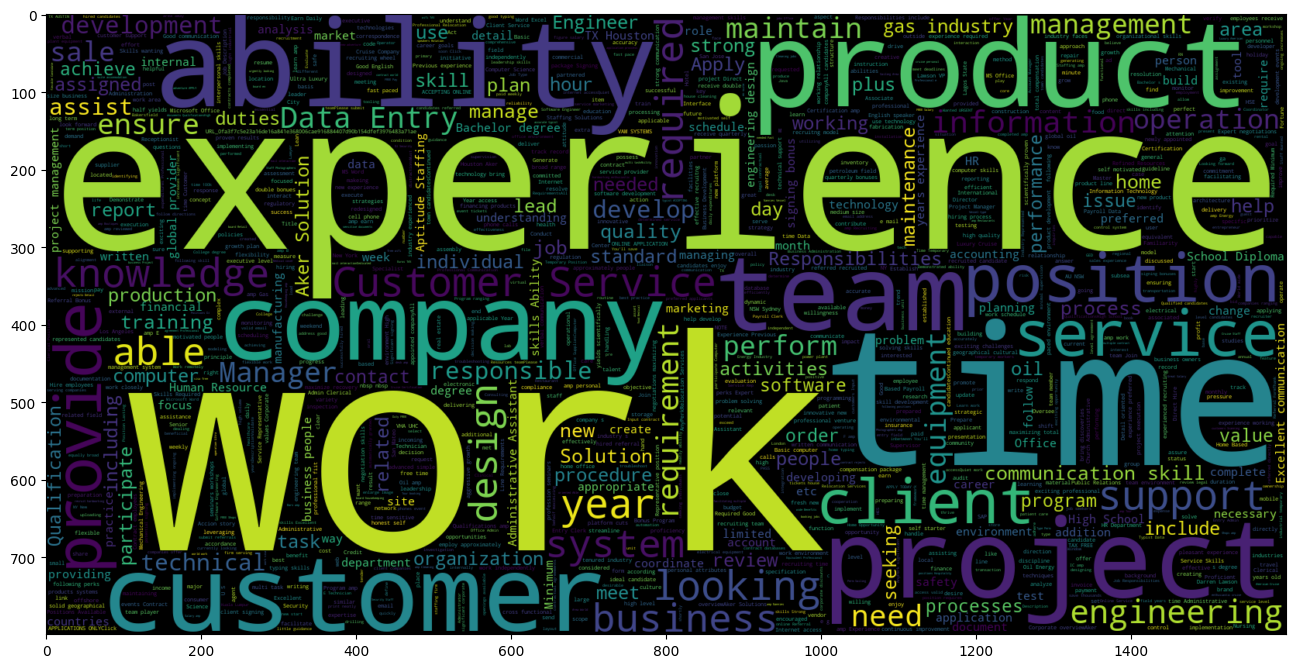

In [68]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

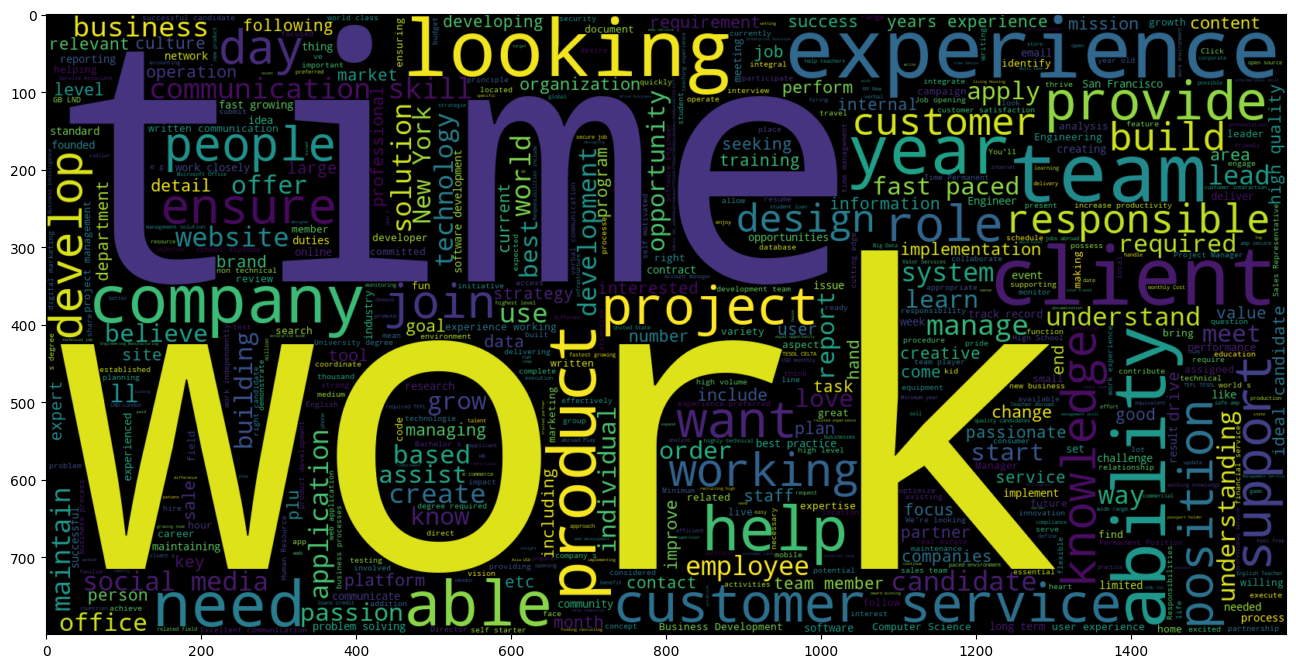

In [69]:
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [70]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
# handling emoticons
url_emote = "https://drive.google.com/uc?id=1HDpafp97gCl9xZTQWMgP2kKK_NuhENlE"
df_emote = pd.read_pickle(url_emote)

def emote_to_word(text):
    for emot in df_emote:
        text = re.sub(u'('+emot+')', "_".join(df_emote[emot].replace(",","").split()), text)
        text = text.replace("<3", "heart" ) # not included in emoticons database
    return text

aug_cop = copy.deepcopy(augmented['text'])
aug_cop = [emote_to_word(t) for t in aug_cop]

augmented_processed = pd.DataFrame({'Original': augmented['text'], 'Without Emotes': aug_cop, 'fraudulent': augmented['fraudulent']})

print(augmented_processed.head())

                                            Original   
0  Marketing Intern US, NY, New York Marketing We...  \
1  Customer Service - Cloud Video Production NZ, ...   
2  Commissioning Machinery Assistant (CMA) US, IA...   
3  Account Executive - Washington DC US, DC, Wash...   
4  Bill Review Manager US, FL, Fort Worth  SpotSo...   

                                      Without Emotes  fraudulent  
0  Marketing Intern US, NY, New York Marketing We...           0  
1  Customer Service - Cloud Video Production NZ, ...           0  
2  Commissioning Machinery Assistant (CMAConfusio...           0  
3  Account Executive - Washington DC US, DC, Wash...           0  
4  Bill Review Manager US, FL, Fort Worth  SpotSo...           0  


In [72]:
#remove stopwords
augmented_filtered = []
for text in augmented_processed['Without Emotes']:
    text_list = text.split()
    filtered_text = [word for word in text_list if word.lower() not in stopwords.words('english')] 
    filtered_sentence = ' '.join(filtered_text)
    augmented_filtered.append(filtered_sentence)

augmented_processed['Filtered'] = augmented_filtered
print(augmented_processed.head())



                                            Original   
0  Marketing Intern US, NY, New York Marketing We...  \
1  Customer Service - Cloud Video Production NZ, ...   
2  Commissioning Machinery Assistant (CMA) US, IA...   
3  Account Executive - Washington DC US, DC, Wash...   
4  Bill Review Manager US, FL, Fort Worth  SpotSo...   

                                      Without Emotes  fraudulent   
0  Marketing Intern US, NY, New York Marketing We...           0  \
1  Customer Service - Cloud Video Production NZ, ...           0   
2  Commissioning Machinery Assistant (CMAConfusio...           0   
3  Account Executive - Washington DC US, DC, Wash...           0   
4  Bill Review Manager US, FL, Fort Worth  SpotSo...           0   

                                            Filtered  
0  Marketing Intern US, NY, New York Marketing We...  
1  Customer Service - Cloud Video Production NZ, ...  
2  Commissioning Machinery Assistant (CMAConfusio...  
3  Account Executive - Washington 

In [73]:
augmented_processed.shape

(18082, 4)

In [74]:
#custom transformer

from sklearn.base import TransformerMixin


class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}


def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [75]:
bow_vector = CountVectorizer(tokenizer = word_tokenize, ngram_range=(1,3),lowercase=True)
bow_vector

CountVectorizer(ngram_range=(1, 3),
                tokenizer=<function word_tokenize at 0x000002265C0ADD00>)

<h3> Creating the Models </h3>

In [76]:
X_train, X_test, y_train, y_test = train_test_split(augmented_processed.Filtered, augmented_processed.fraudulent, 
                                                    test_size=0.3, random_state=101)

In [77]:
clf = LogisticRegression()


pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])


pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x0000022626EE0A90>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function word_tokenize at 0x000002265C0ADD00>)),
                ('classifier', LogisticRegression())])

Logistic Regression Accuracy: 0.9850691244239631
Logistic Regression Recall: 0.7403508771929824
Logistics Regression AUC Score:  0.8694945047443512


Text(113.9222222222222, 0.5, 'true value')

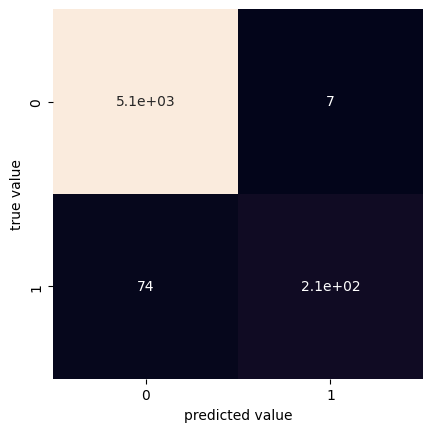

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
predicted = pipe.predict(X_test)


print("Logistic Regression Accuracy:", accuracy_score(y_test, predicted))
print("Logistic Regression Recall:", recall_score(y_test, predicted))
print("Logistics Regression AUC Score: ", roc_auc_score(y_test, predicted))

mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [79]:
clf = RandomForestClassifier()


pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])


pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x0000022622BA8190>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function word_tokenize at 0x000002265C0ADD00>)),
                ('classifier', RandomForestClassifier())])

Random Forest Accuracy: 0.9826728110599078
Random Forest Recall: 0.6771929824561403
Random Forest AUC Score:  0.8384019386988872


Text(113.9222222222222, 0.5, 'true value')

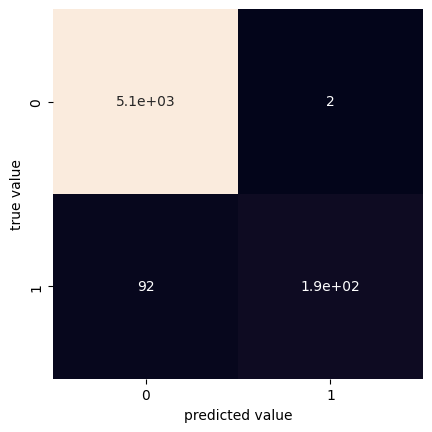

In [80]:
predicted = pipe.predict(X_test)


print("Random Forest Accuracy:", accuracy_score(y_test, predicted))
print("Random Forest Recall:", recall_score(y_test, predicted))
print("Random Forest AUC Score: ", roc_auc_score(y_test, predicted))

mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [81]:
clf = XGBClassifier()


pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])


pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000226A587F4D0>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function word_tokenize at 0x000002265C0ADD00>)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enab...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

XGBoost Accuracy: 0.983225806451613
XGBoost Recall: 0.7017543859649122
XGBoost AUC Score:  0.8502935353949075


Text(113.9222222222222, 0.5, 'true value')

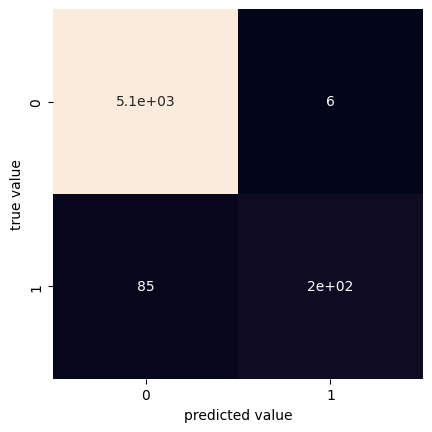

In [82]:
predicted = pipe.predict(X_test)


print("XGBoost Accuracy:", accuracy_score(y_test, predicted))
print("XGBoost Recall:", recall_score(y_test, predicted))
print("XGBoost AUC Score: ", roc_auc_score(y_test, predicted))

mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [83]:
clf = SVC()

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])


pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000002262FE46A10>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function word_tokenize at 0x000002265C0ADD00>)),
                ('classifier', SVC())])

SVC Accuracy: 0.9708755760368664
SVC Recall: 0.4456140350877193
SVC AUC Score:  0.7228070175438597


Text(113.9222222222222, 0.5, 'true value')

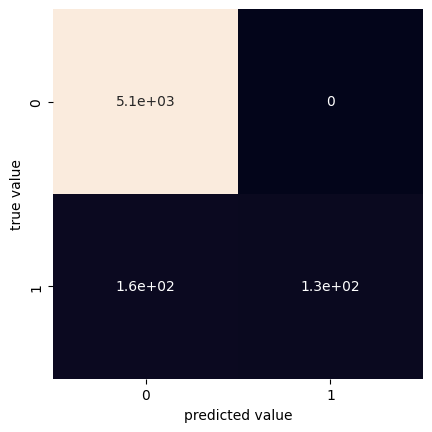

In [84]:
predicted = pipe.predict(X_test)


print("SVC Accuracy:", accuracy_score(y_test, predicted))
print("SVC Recall:", recall_score(y_test, predicted))
print("SVC AUC Score: ", roc_auc_score(y_test, predicted))

mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [85]:
clf = KNeighborsClassifier()

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])


pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000002262E017D10>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function word_tokenize at 0x000002265C0ADD00>)),
                ('classifier', KNeighborsClassifier())])

KNN Accuracy: 0.9181566820276498
KNN Recall: 0.6666666666666666
KNN AUC Score:  0.7993839169909208


Text(113.9222222222222, 0.5, 'true value')

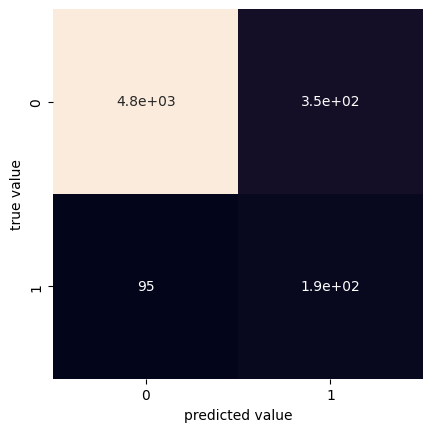

In [86]:
predicted = pipe.predict(X_test)


print("KNN Accuracy:", accuracy_score(y_test, predicted))
print("KNN Recall:", recall_score(y_test, predicted))
print("KNN AUC Score: ", roc_auc_score(y_test, predicted))

mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [87]:
clf = DecisionTreeClassifier()

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])


pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000226C52305D0>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function word_tokenize at 0x000002265C0ADD00>)),
                ('classifier', DecisionTreeClassifier())])

Decision Tree Accuracy: 0.9789861751152074
Decision Tree: 0.7614035087719299
Decision Tree AUC Score:  0.8762270462147588


Text(113.9222222222222, 0.5, 'true value')

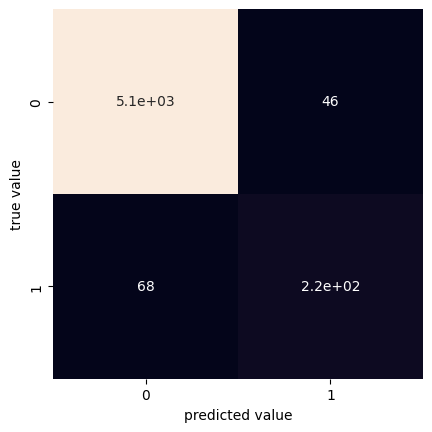

In [88]:
predicted = pipe.predict(X_test)


print("Decision Tree Accuracy:", accuracy_score(y_test, predicted))
print("Decision Tree:", recall_score(y_test, predicted))
print("Decision Tree AUC Score: ", roc_auc_score(y_test, predicted))


mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')